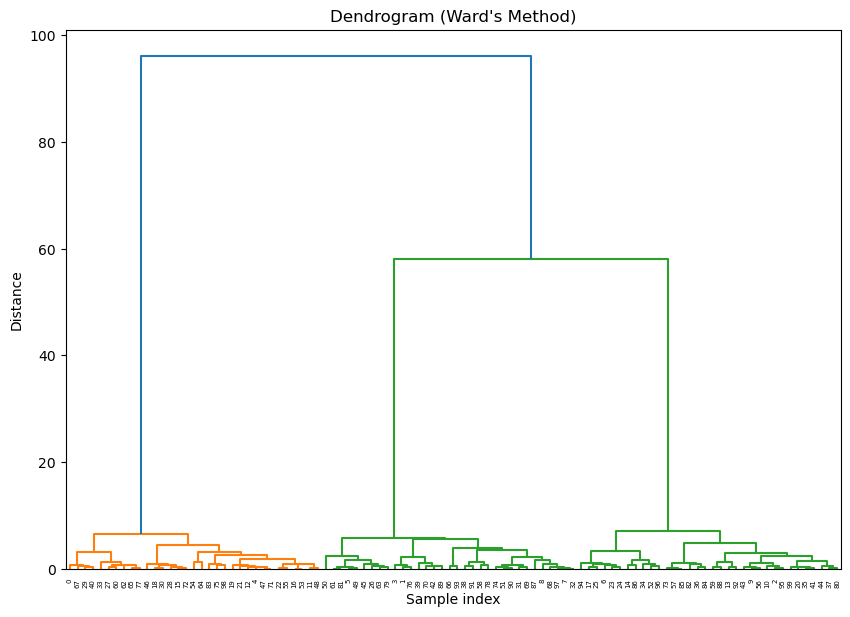

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2)

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Ward\'s Method)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


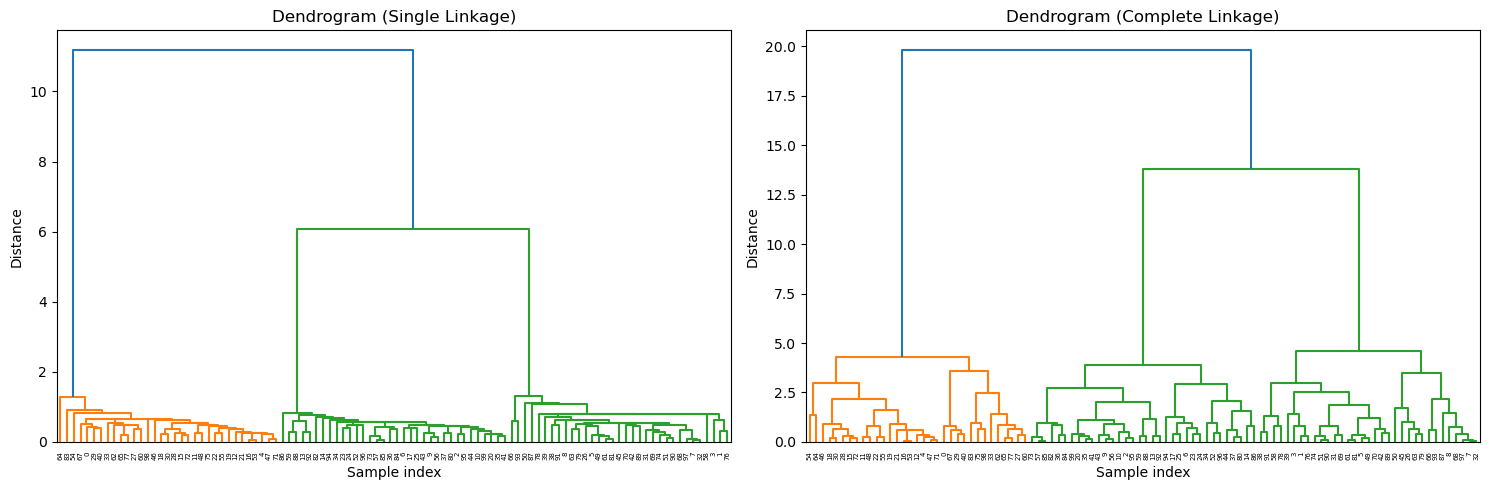

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2)

# Perform hierarchical clustering using Single Linkage
Z_single = linkage(X, method='single')

# Perform hierarchical clustering using Complete Linkage
Z_complete = linkage(X, method='complete')

# Plot the dendrogram for Single Linkage
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
dendrogram(Z_single)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Plot the dendrogram for Complete Linkage
plt.subplot(1, 2, 2)
dendrogram(Z_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


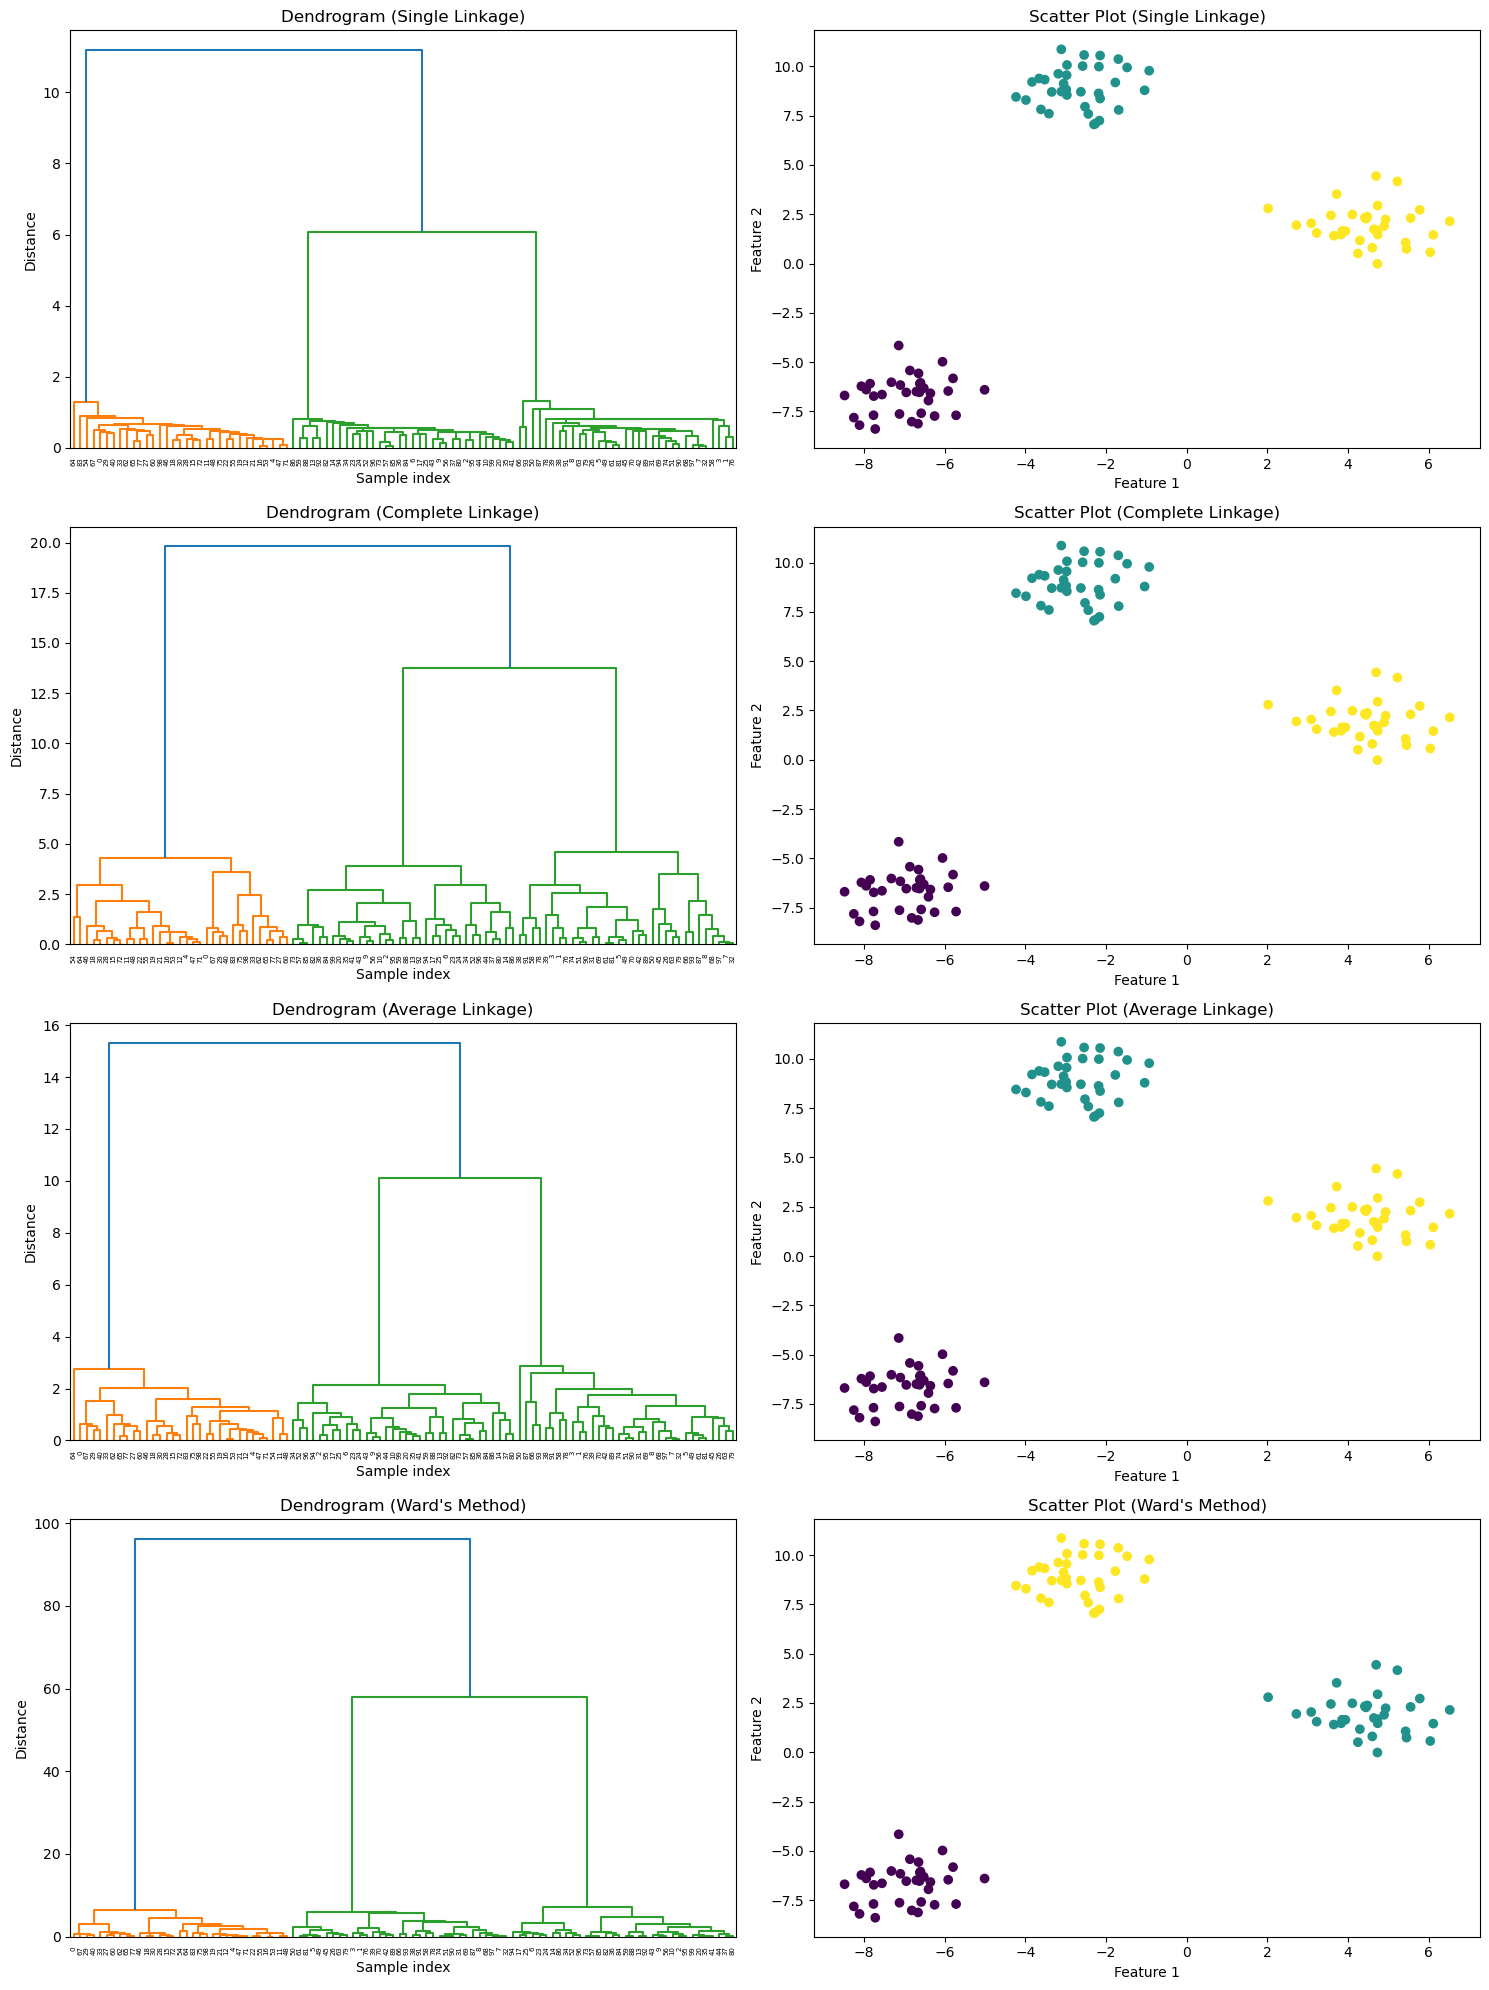

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, n_features=2)

# Define linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
method_names = ['Single Linkage', 'Complete Linkage', 'Average Linkage', "Ward's Method"]

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(X, method=method)
    
    # Plot the dendrogram
    ax_dendro = axes[i, 0]
    dendrogram(Z, ax=ax_dendro)
    ax_dendro.set_title(f'Dendrogram ({method_names[i]})')
    ax_dendro.set_xlabel('Sample index')
    ax_dendro.set_ylabel('Distance')
    
    # Determine clusters based on a cut-off
    clusters = fcluster(Z, 3, criterion='maxclust')  # Specify number of clusters
    
    # Plot the scatter plot of the clusters
    ax_scatter = axes[i, 1]
    ax_scatter.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    ax_scatter.set_title(f'Scatter Plot ({method_names[i]})')
    ax_scatter.set_xlabel('Feature 1')
    ax_scatter.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
